# pre proccesses

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-pastel")
sns.set_theme(color_codes=True)

In [5]:
titanic_f = pd.read_csv("/Users/pushpakruhil/DATA SCIENCE/HOML/CHAPTER 2/KAGGLE TITANIC MODEL/titanic/train.csv", index_col=0)

In [6]:
titanic_f.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
titanic_f.loc[:,"SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [9]:
titanic_f.drop("Name", axis=1, inplace=True)

In [10]:
titanic_f.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic_f.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
corr_matrix = titanic_f.corr()

In [13]:
corr_matrix["Age"]

Survived   -0.077221
Pclass     -0.369226
Age         1.000000
SibSp      -0.308247
Parch      -0.189119
Fare        0.096067
Name: Age, dtype: float64

In [14]:
mean = np.mean(titanic_f.loc[:,"Age"])
titanic_f.loc[:,"Age"].fillna(mean, inplace=True)

In [15]:
titanic_f.drop("Cabin", axis=1, inplace=True)

In [16]:
titanic_f.loc[:,"Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
titanic_f.groupby("Embarked",dropna=False).count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
Embarked,,,,,,,,
C,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644,644
NaN,2,2,2,2,2,2,2,2


In [18]:
titanic_f.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [19]:
titanic_f.dropna(inplace=True)

In [20]:
titanic_f

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.000000,1,0,113803,53.1000,S
5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,211536,13.0000,S
888,1,1,female,19.000000,0,0,112053,30.0000,S
889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S


In [21]:
titanic_t = titanic_f.loc[:,"Survived"].copy()
titanic_f = titanic_f.drop("Survived", axis=1)


In [22]:
titanic_f.drop("Ticket", axis=1, inplace=True)

In [23]:
titanic_f

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.000000,1,0,7.2500,S
2,1,female,38.000000,1,0,71.2833,C
3,3,female,26.000000,0,0,7.9250,S
4,1,female,35.000000,1,0,53.1000,S
5,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
887,2,male,27.000000,0,0,13.0000,S
888,1,female,19.000000,0,0,30.0000,S
889,3,female,29.699118,1,2,23.4500,S


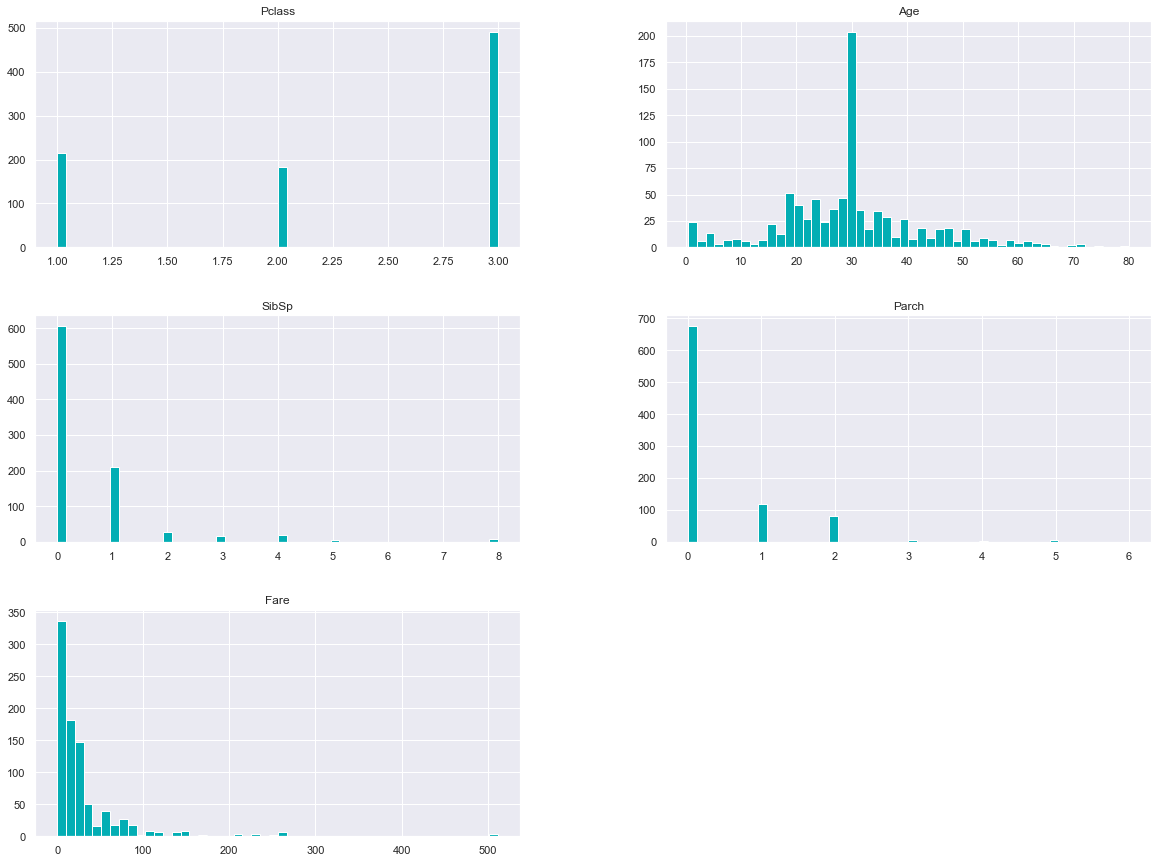

In [24]:
titanic_f.hist(bins = 50, figsize=(20,15), color="#03aeb4");

In [25]:
titanic_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.6+ KB


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("std_scaler", StandardScaler())
])



In [27]:
titanic_num = titanic_f.drop(["Sex", "Embarked"], axis=1)

num_att = list(titanic_num)
cat_att = ["Sex", "Embarked"]



from sklearn.compose import ColumnTransformer


full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_att),
    ("cat", OneHotEncoder(), cat_att)
])

In [28]:
titanic_prepared = full_pipeline.fit_transform(titanic_f)

# data modelling

## LR

In [29]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(titanic_prepared, titanic_t)

LinearRegression()

In [30]:
some_data = titanic_f.iloc[:5]
some_labels = titanic_t.iloc[:5]


In [31]:
some_data_prepared = full_pipeline.transform(some_data)

In [32]:
print("prediction :", LR.predict(some_data_prepared))
print("labels :", list(some_labels))


prediction : [0.09394992 0.93065894 0.61554641 0.87786497 0.05867567]
labels : [0, 1, 1, 1, 0]


In [33]:
LR.score(titanic_prepared, titanic_t)

0.39629965498543696

## DT

In [34]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()

DT.fit(titanic_prepared, titanic_t)

DecisionTreeRegressor()

In [35]:
print("prediction :", DT.predict(some_data_prepared))
print("labels :", list(some_labels))

DT.score(titanic_prepared, titanic_t)

prediction : [0. 1. 1. 1. 0.]
labels : [0, 1, 1, 1, 0]


0.9542386781670774

In [36]:
from sklearn.metrics import mean_squared_error

titanic_predictions = DT.predict(titanic_prepared)

tree_mse = mean_squared_error(titanic_t, titanic_predictions)

tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.10396164675975644

## RF

In [37]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()

RF.fit(titanic_prepared, titanic_t)

RandomForestRegressor()

In [38]:
print("prediction :", RF.predict(some_data_prepared))
print("labels :", list(some_labels))

RF.score(titanic_prepared, titanic_t)

prediction : [0.10583333 1.         0.9        1.         0.        ]
labels : [0, 1, 1, 1, 0]


0.8853957109397077

## CV 


In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DT, titanic_prepared, titanic_t, 
                        scoring = "neg_mean_squared_error", cv=10)

DT_rmse_cv = np.sqrt(-scores)

DT_rmse_cv.mean()

0.4694241559787796

In [40]:
LR_scores = cross_val_score(LR, titanic_prepared, titanic_t, 
                        scoring = "neg_mean_squared_error", cv=10)

LR_rmse_cv = np.sqrt(-LR_scores)

LR_rmse_cv.mean()

0.3824749030903818

In [41]:
RF_scores = cross_val_score(RF, titanic_prepared, titanic_t, 
                        scoring = "neg_mean_squared_error", cv=10)

RF_rmse_cv = np.sqrt(-RF_scores)

RF_rmse_cv.mean()

0.3750270428681177

## SVM


In [42]:
from sklearn.svm import SVR

SV = SVR()

SV.fit(titanic_prepared, titanic_t)

SVR()

In [43]:
print("prediction :", np.round(RF.predict(titanic_prepared[-5:])))
print("labels :", list(titanic_t.tail(5)))

SV.score(titanic_prepared, titanic_t)

prediction : [0. 1. 0. 1. 0.]
labels : [0, 1, 0, 1, 0]


0.48262355280034575

In [44]:
SV_scores = cross_val_score(SV, titanic_prepared, titanic_t, 
                        scoring = "neg_mean_squared_error", cv=10)

SV_rmse_cv = np.sqrt(-SV_scores)

SV_rmse_cv.mean()

0.37166575157245657

In [45]:
test_set = pd.read_csv("/Users/pushpakruhil/DATA SCIENCE/HOML/CHAPTER 2/KAGGLE TITANIC MODEL/titanic/test.csv", index_col=0)

In [46]:
test_set.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [47]:
titanic_f.head(2)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C


In [48]:
test_set.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q


In [49]:
test_set_prepared = full_pipeline.transform(test_set)

In [50]:
X = np.round(LR.predict(test_set_prepared))


In [51]:
df = pd.DataFrame(X, index=test_set.index)

In [52]:
df.to_csv("submission_3.csv")

# classification model


In [106]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()

sgd_clf.fit(titanic_prepared, titanic_t)

SGDClassifier()

In [107]:
print("prediction :", sgd_clf.predict(some_data_prepared))
print("labels :", list(some_labels))

sgd_clf.score(titanic_prepared, titanic_t)

prediction : [0 1 1 1 0]
labels : [0, 1, 1, 1, 0]


0.7806524184476941

In [108]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(sgd_clf, titanic_prepared, titanic_t, cv=10, scoring="accuracy"))

0.7694841675178753

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
titanic_prepared_scaled = scaler.fit_transform(titanic_prepared)

In [109]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(sgd_clf, titanic_prepared_scaled, titanic_t, cv=10, scoring="accuracy"))

0.7592568947906025

In [110]:
X = sgd_clf.predict(test_set_prepared)

In [111]:
df = pd.DataFrame(X, index=test_set.index)

In [112]:
df

,0
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [113]:
#df.astype(int)

In [114]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [115]:
df.columns = [ "Survived"]

In [117]:
df

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [116]:
df.to_csv("clf_submission.csv")